<a href="https://colab.research.google.com/github/demekeendalie/Fine-tuning-bert-model-for-amharic-news-classification/blob/main/Fine_tuning_BERT_for_Amharic_news_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import tensorflow as tf


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# reading the dataset from my drive using the above drive
dataframe1 =pd.read_excel('/content/drive/My Drive/dataset1.xlsx')
dataframe2 =pd.read_excel('/content/drive/My Drive/dataset2.xlsx')

In [10]:
dataframe1.category.unique()

array(['accident', 'agriculture', 'health', 'education', 'economy',
       'politics', 'sport'], dtype=object)

In [11]:
# merging the two dataframes
frame=[dataframe1,dataframe2]
dataframe=pd.concat(frame)

In [12]:
print(dataframe)

                                              articles   category
0     ግንቦት 13/2011  በተሽከርካሪ አደጋ ድንገተኛ ህክምና የተፈቀደው ሁ...   accident
1    ሚያዝያ  25/ 2011 የሰሜን ተራሮች ብሄራዊ ፓርክን የአደጋ ስጋቶች ለ...   accident
2    በደቡብ ወሎ ዞን ኩታበር ወረዳ ዛሬ በደረሰ የትራፊክ አደጋ በ11 ሰዎች ...   accident
3    የህዝብ ተወካዮች ምክር ቤት አባላት ዛሬ ጠዋት የተፈናቀሉ ወገኖችን ለመጎ...   accident
4    በባህር ዳር ከተማ ቀበሌ 05 በእሳት አደጋ ቤትና ንብረት የወደመባቸው ሰ...   accident
..                                                 ...        ...
695  ጎባ፤ መስከረም 16/2015 (ኢዜአ) መደ ወላቡ ዩኒቨርሲቲ ተጨማሪ 13 ...  education
696  ባህር ዳር ሰኔ 7/2010 በአማራ ክልል ከህብረተሰቡ ከደረሱት ጥቆማዎች ...  education
697  አዲስ አበባ ሰኔ 29/2010 የትምህርት ጥራት ጉድለት በአገሪቱ ላይ ዘር...  education
698  አዲስ አበባ፤ መስከረም 15/ 2016 (ኢዜአ)፦ በተባበሩት አረብ ኤምሬቶ...  education
699  አዲስ አበባ መጋቢት 4/2012(ኢዜአ) ግማሽ ቢሊዮን ብር ወጪ የተደረገበ...  education

[2181 rows x 2 columns]


In [13]:
# changing category to numeric
label=pd.Categorical(dataframe['category']).codes
label=pd.DataFrame(label)
dataframe['labels']=pd.DataFrame(label)
print(dataframe)

                                              articles   category  labels
0     ግንቦት 13/2011  በተሽከርካሪ አደጋ ድንገተኛ ህክምና የተፈቀደው ሁ...   accident       0
1    ሚያዝያ  25/ 2011 የሰሜን ተራሮች ብሄራዊ ፓርክን የአደጋ ስጋቶች ለ...   accident       0
2    በደቡብ ወሎ ዞን ኩታበር ወረዳ ዛሬ በደረሰ የትራፊክ አደጋ በ11 ሰዎች ...   accident       0
3    የህዝብ ተወካዮች ምክር ቤት አባላት ዛሬ ጠዋት የተፈናቀሉ ወገኖችን ለመጎ...   accident       0
4    በባህር ዳር ከተማ ቀበሌ 05 በእሳት አደጋ ቤትና ንብረት የወደመባቸው ሰ...   accident       0
..                                                 ...        ...     ...
695  ጎባ፤ መስከረም 16/2015 (ኢዜአ) መደ ወላቡ ዩኒቨርሲቲ ተጨማሪ 13 ...  education       3
696  ባህር ዳር ሰኔ 7/2010 በአማራ ክልል ከህብረተሰቡ ከደረሱት ጥቆማዎች ...  education       3
697  አዲስ አበባ ሰኔ 29/2010 የትምህርት ጥራት ጉድለት በአገሪቱ ላይ ዘር...  education       3
698  አዲስ አበባ፤ መስከረም 15/ 2016 (ኢዜአ)፦ በተባበሩት አረብ ኤምሬቶ...  education       3
699  አዲስ አበባ መጋቢት 4/2012(ኢዜአ) ግማሽ ቢሊዮን ብር ወጪ የተደረገበ...  education       3

[2181 rows x 3 columns]


In [14]:
# mixing each categories and thier labels
dataframe=dataframe.sample(frac=1)

In [15]:
dataframe['word_len'] = dataframe['articles'].str.split().str.len()
print(dataframe['word_len'].mean())

314.2563044475011


In [16]:
#number of news under each categories
#accident=dataframe[dataframe['category']=='accident']
#agir=dataframe[dataframe['category']=='agriculture']
#health=dataframe[dataframe['category']=='health']
#education=dataframe[dataframe['category']=='education']
#economy=dataframe[dataframe['category']=='economy']
#politics=dataframe[dataframe['category']=='politics']
#sport=dataframe[dataframe['category']=='sport']
#print(accident.shape)
#print(agir.shape)
#print(health.shape)
#print(education.shape)
#print(economy.shape)
#print(politics.shape)
#print(sport.shape)

In [17]:
#normalizarion
import re
#method to normalize character level missmatch such as ጸሀይ and ፀሐይ
def normalization(input_token):
    rep1=re.sub('[ሃኅኃሐሓኻ]','ሀ',input_token)
    rep2=re.sub('[ሑኁዅ]','ሁ',rep1)
    rep3=re.sub('[ኂሒኺ]','ሂ',rep2)
    rep4=re.sub('[ኌሔዄ]','ሄ',rep3)
    rep5=re.sub('[ሕኅ]','ህ',rep4)
    rep6=re.sub('[ኆሖኾ]','ሆ',rep5)
    rep7=re.sub('[ሠ]','ሰ',rep6)
    rep8=re.sub('[ሡ]','ሱ',rep7)
    rep9=re.sub('[ሢ]','ሲ',rep8)
    rep10=re.sub('[ሣ]','ሳ',rep9)
    rep11=re.sub('[ሤ]','ሴ',rep10)
    rep12=re.sub('[ሥ]','ስ',rep11)
    rep13=re.sub('[ሦ]','ሶ',rep12)
    rep14=re.sub('[ዓኣዐ]','አ',rep13)
    rep15=re.sub('[ዑ]','ኡ',rep14)
    rep16=re.sub('[ዒ]','ኢ',rep15)
    rep17=re.sub('[ዔ]','ኤ',rep16)
    rep18=re.sub('[ዕ]','እ',rep17)
    rep19=re.sub('[ዖ]','ኦ',rep18)
    rep20=re.sub('[ጸ]','ፀ',rep19)
    rep21=re.sub('[ጹ]','ፁ',rep20)
    rep22=re.sub('[ጺ]','ፂ',rep21)
    rep23=re.sub('[ጻ]','ፃ',rep22)
    rep24=re.sub('[ጼ]','ፄ',rep23)
    rep25=re.sub('[ጽ]','ፅ',rep24)
    rep26=re.sub('[ጾ]','ፆ',rep25)
    rep27=re.sub('(ሉ[ዋአ])','ሏ',rep26)
    rep28=re.sub('(ሙ[ዋአ])','ሟ',rep27)
    rep29=re.sub('(ቱ[ዋአ])','ቷ',rep28)
    rep30=re.sub('(ሩ[ዋአ])','ሯ',rep29)
    rep31=re.sub('(ሱ[ዋአ])','ሷ',rep30)
    rep32=re.sub('(ሹ[ዋአ])','ሿ',rep31)
    rep33=re.sub('(ቁ[ዋአ])','ቋ',rep32)
    rep34=re.sub('(ቡ[ዋአ])','ቧ',rep33)
    rep35=re.sub('(ቹ[ዋአ])','ቿ',rep34)
    rep36=re.sub('(ሁ[ዋአ])','ኋ',rep35)
    rep37=re.sub('(ኑ[ዋአ])','ኗ',rep36)
    rep38=re.sub('(ኙ[ዋአ])','ኟ',rep37)
    rep39=re.sub('(ኩ[ዋአ])','ኳ',rep38)
    rep40=re.sub('(ዙ[ዋአ])','ዟ',rep39)
    rep41=re.sub('(ጉ[ዋአ])','ጓ',rep40)
    rep42=re.sub('(ደ[ዋአ])','ዷ',rep41)
    rep43=re.sub('(ጡ[ዋአ])','ጧ',rep42)
    rep44=re.sub('(ጩ[ዋአ])','ጯ',rep43)
    rep45=re.sub('(ጹ[ዋአ])','ጿ',rep44)
    rep46=re.sub('(ፉ[ዋአ])','ፏ',rep45)
    rep47=re.sub('[ቊ]','ቁ',rep46) #ቁ can be written as ቊ
    rep48=re.sub('[ኵ]','ኩ',rep47) #ኩ can be also written as ኵ
    return rep48

In [18]:
# apply normalization and special characters removal
dataframe['articles']=dataframe['articles'].apply(lambda x: normalization(x))

In [19]:
# special symbol removal
dataframe['articles']=dataframe['articles'].str.replace('[^\w\s]','',regex=True)

In [20]:
# removing digits from the dataset
dataframe['articles']=dataframe['articles'].str.replace('\d+','',regex=True)

In [21]:
print(dataframe)

                                               articles     category  labels  \
970   የመሬት ይዞታ ማረጋጋጫው የወሰን ይገባኛል ግጭትን እንዳስቀረላቸው በምእራ...      economy       2   
426   በመተማ የመጀመሪያ ደረጃ ሆስፒታል ተገቢውን የህክምና አገልግሎት ማግኘት ...       health       4   
1293  በመላ ኢትዮጵያ ሴቶች ጨዋታ በሜዳሊያ ብዛት የኦሮሚያ ክልል እየመራ ነዉ\...        sport       6   
511   አዲስ አበባ ጥቅምት   ኤፍ ቢ ሲ የጡት ካንሰር በአለማችን ካሉ የካንሰር...       health       4   
442   በስሁል ሽሬ ሆስፒታል በተደረገልን የአይን ቀዶ ህክምና ማየት ችለናል ተጠ...       health       4   
...                                                 ...          ...     ...   
241   በምስራቅ ጎጃም  ሺህ ሄክታር መሬት ዳግመኛ እየለማ ነው\n\nደብረማርቆስ...  agriculture       1   
1193  የቻይና ፓርላማ ሊቀመንበር ሊ ዛንሹ አዲስ አበባ ገቡ\nአዲስ አበባ ግንቦ...     politics       5   
499   በግራር ጃርሶ ወረዳ የተሻሻሉ የግብርና አሰራሮችን የተጠቀሙ አርሳ አደሮች...       health       4   
556   የማህፀን በር ጫፍ ቅድመ ካንሰር ምርመራ አገልግሎት ማግኘት አልቻልንም የ...       health       4   
375   የራያ አዘቦ ወረዳ አርሶ አደሮች የገበያ ትሰስር ባለመፈጠሩ ለምርታችን ተ...  agriculture       1   

      word_len  
970        261  
426  

In [22]:
# train test split
from sklearn.model_selection import train_test_split
train_val_df, test_dataset = train_test_split(dataframe, test_size=0.20, random_state=42)
train_dataset, evaluation_dataset = train_test_split(train_val_df, test_size=0.10, random_state=42)
print('Training dataset shape: ', train_dataset.shape)
print('Validation dataset shape: ', evaluation_dataset.shape)
print('Testing dataset shape: ', test_dataset.shape)

Training dataset shape:  (1569, 4)
Validation dataset shape:  (175, 4)
Testing dataset shape:  (437, 4)


In [23]:
print(dataframe.head(10))

                                               articles     category  labels  \
970   የመሬት ይዞታ ማረጋጋጫው የወሰን ይገባኛል ግጭትን እንዳስቀረላቸው በምእራ...      economy       2   
426   በመተማ የመጀመሪያ ደረጃ ሆስፒታል ተገቢውን የህክምና አገልግሎት ማግኘት ...       health       4   
1293  በመላ ኢትዮጵያ ሴቶች ጨዋታ በሜዳሊያ ብዛት የኦሮሚያ ክልል እየመራ ነዉ\...        sport       6   
511   አዲስ አበባ ጥቅምት   ኤፍ ቢ ሲ የጡት ካንሰር በአለማችን ካሉ የካንሰር...       health       4   
442   በስሁል ሽሬ ሆስፒታል በተደረገልን የአይን ቀዶ ህክምና ማየት ችለናል ተጠ...       health       4   
788   የዩኒቨርሲቲ ተማሪዎችን ለመቀበል ተዘጋጅተናልየአሶሳ ነዋሪዎች\n\n\nአሶ...    education       3   
136     ዳሽን ባንክ ሽሪክ በሚል ስያሜ  ከወለድ ነፃ የባንክ አገልግሎት ዙሪያ...      economy       0   
419   ኢዜአ ታህሳስ  የኢትዮጵያ ግብርና ምርምር ኢንስቲትዩት የምርምር ውጤቶችን...  agriculture       4   
671   በትግራይ ክልል ሺህ ለሚበልጡ የተፈናቃይ ቤተሰብ ልጆች የፅህፈት መሳሪያ ...    education       3   
193   የተቆፈሩ ጉድጓዶች ውሀ እያቆሩ ለጎርፍና ሌሎች ተያያዥ ጉዳቶች ስጋት ሆነ...     accident       0   

      word_len  
970        261  
426        296  
1293       157  
511         91  
442        250  
788        252  


In [24]:
msk = np.random.rand(len(dataframe)) < 0.8
train_dataset = dataframe[msk]
test_dataset = dataframe[~msk]

In [25]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [26]:
from datasets import Dataset

In [27]:
#convert format of the dataset to HuggingFace Dataset from Pandas DataFrame
test_dataset=Dataset.from_pandas(test_dataset)


In [28]:
#convert the format of the dataset to HuggingFace Dataset from Pandas DataFrame
train_dataset=Dataset.from_pandas(train_dataset)

In [29]:
#convert the format of the dataset to HuggingFace Dataset from Pandas DataFrame
evaluation_dataset=Dataset.from_pandas(evaluation_dataset)

In [30]:
#preview of the dataset after conversion
(test_dataset)

Dataset({
    features: ['articles', 'category', 'labels', 'word_len', '__index_level_0__'],
    num_rows: 429
})

In [31]:
print(test_dataset['labels'])

[4, 4, 4, 1, 6, 1, 6, 3, 0, 0, 0, 4, 0, 1, 2, 6, 5, 5, 4, 3, 6, 0, 3, 5, 6, 3, 4, 5, 5, 4, 6, 4, 2, 0, 6, 6, 4, 4, 3, 2, 0, 1, 1, 1, 1, 1, 0, 4, 4, 5, 5, 2, 2, 6, 3, 4, 5, 2, 1, 6, 0, 5, 4, 1, 4, 5, 3, 0, 1, 0, 3, 5, 0, 1, 4, 1, 4, 0, 2, 6, 4, 1, 4, 0, 5, 6, 4, 1, 4, 3, 2, 4, 1, 0, 4, 3, 0, 1, 6, 3, 6, 6, 1, 4, 6, 3, 4, 3, 2, 1, 5, 1, 6, 6, 3, 5, 4, 4, 1, 3, 0, 4, 6, 0, 1, 1, 3, 0, 1, 0, 2, 0, 5, 4, 1, 2, 0, 0, 3, 6, 1, 2, 3, 1, 5, 1, 5, 4, 5, 0, 4, 4, 2, 4, 2, 6, 1, 5, 0, 6, 2, 2, 3, 4, 4, 1, 0, 5, 0, 5, 4, 0, 4, 6, 6, 5, 4, 2, 0, 5, 2, 1, 1, 2, 3, 5, 3, 5, 4, 6, 3, 6, 1, 6, 2, 2, 4, 1, 1, 4, 2, 2, 1, 4, 1, 4, 4, 1, 6, 0, 2, 0, 3, 4, 4, 0, 6, 3, 1, 4, 5, 3, 5, 3, 5, 2, 6, 5, 5, 4, 4, 4, 3, 0, 2, 0, 0, 0, 0, 3, 5, 4, 0, 0, 4, 6, 3, 0, 2, 1, 0, 6, 1, 4, 0, 4, 5, 6, 0, 1, 1, 1, 4, 1, 1, 5, 4, 4, 4, 0, 1, 2, 4, 1, 1, 4, 0, 3, 3, 3, 2, 1, 1, 1, 1, 0, 1, 5, 0, 3, 6, 6, 4, 0, 5, 3, 5, 3, 6, 6, 4, 2, 5, 4, 2, 1, 1, 4, 3, 5, 4, 4, 4, 5, 5, 1, 0, 4, 5, 0, 0, 0, 4, 5, 0, 4, 5, 6, 1, 0, 4, 6, 0, 

In [32]:
(train_dataset)

Dataset({
    features: ['articles', 'category', 'labels', 'word_len', '__index_level_0__'],
    num_rows: 1752
})

In [33]:
(evaluation_dataset)

Dataset({
    features: ['articles', 'category', 'labels', 'word_len', '__index_level_0__'],
    num_rows: 175
})

In [34]:
#remove unnecessary column
test_dataset=test_dataset.remove_columns("__index_level_0__")
train_dataset=train_dataset.remove_columns("__index_level_0__")
evaluation_dataset=evaluation_dataset.remove_columns("__index_level_0__")

In [35]:
#combine the train and test dataset into one datset
import datasets
main_dataset= datasets.DatasetDict({
    'train': train_dataset,
    'test': test_dataset,
    'evaluate': evaluation_dataset
})

In [36]:
main_dataset

DatasetDict({
    train: Dataset({
        features: ['articles', 'category', 'labels', 'word_len'],
        num_rows: 1752
    })
    test: Dataset({
        features: ['articles', 'category', 'labels', 'word_len'],
        num_rows: 429
    })
    evaluate: Dataset({
        features: ['articles', 'category', 'labels', 'word_len'],
        num_rows: 175
    })
})

In [37]:
# training and testing data size
training_data_size = main_dataset['train'].num_rows
testing_data_size = main_dataset['test'].num_rows
evaluation_data_size = main_dataset['evaluate'].num_rows

In [38]:
pip install transformers -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 87.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 65.5 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.44.2
    Uninstalling transformers-4.44.2:
      Successfully uninstalled transformers-4.44.2


In [39]:
from transformers import AutoTokenizer

In [40]:
#loading a tokenizer from the pretrained model
tokenizer = AutoTokenizer.from_pretrained("Davlan/bert-base-multilingual-cased-finetuned-amharic")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/335 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/798 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.55M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [41]:
#Have a tokenizer function that uses the tokenizer
def tokenize_function(data):
    return tokenizer(data["articles"], padding="max_length", truncation=True)

In [42]:
#Tokenize all the data using the mapping functionality
tokenized_datasets = main_dataset.map(tokenize_function)

Map:   0%|          | 0/1752 [00:00<?, ? examples/s]

Map:   0%|          | 0/429 [00:00<?, ? examples/s]

Map:   0%|          | 0/175 [00:00<?, ? examples/s]

In [43]:
#remove the posts column as it is no longer needed
tokenized_datasets = tokenized_datasets.remove_columns(["articles"])

In [44]:
#import torch
import torch
#import Data loader from torch
from torch.utils.data import DataLoader
#import an optimizer
from torch.optim import AdamW
#import tqdm for a progress bar
from tqdm.auto import tqdm

In [45]:
#changing the format of the tokenized dataset to torch
tokenized_datasets.set_format("torch")

In [46]:
#shuffeling and selecting the needed size of dataset for training and evaluating the model
small_train_dataset = tokenized_datasets["train"].shuffle(seed=42).select(range(training_data_size))
small_test_dataset = tokenized_datasets["test"].shuffle(seed=42).select(range(testing_data_size))
small_eval_dataset = tokenized_datasets["evaluate"].shuffle(seed=42).select(range(evaluation_data_size))

In [47]:
# preview of the shuffeled and selected evaluation dataset
small_eval_dataset

Dataset({
    features: ['category', 'labels', 'word_len', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 175
})

In [48]:
train_dataloader = DataLoader(small_train_dataset, shuffle=True, batch_size=4)
eval_dataloader = DataLoader(small_eval_dataset, batch_size=4)
test_dataloader = DataLoader(small_test_dataset, batch_size=4)

In [49]:
#Load auto mode classifier from the pretrained model
from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained("Davlan/bert-base-multilingual-cased-finetuned-amharic", num_labels=7)

pytorch_model.bin:   0%|          | 0.00/712M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at Davlan/bert-base-multilingual-cased-finetuned-amharic and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [50]:
import torch

device = torch.device("cpu")

if torch.cuda.is_available():
   print("Training on GPU")
   device = torch.device("cuda:0")
print(device)

Training on GPU
cuda:0


In [51]:
pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 2.6 MB/s eta 0:00:00


In [52]:
import numpy as np
from evaluate import load
metric = load("f1","accuracy")

In [53]:

#def compute_metrics(eval_pred):
 #   logits, labels = eval_pred
#    predictions = np.argmax(logits, axis=-1)
 #   return metric.compute(predictions=predictions, references=labels, average="weighted")

In [54]:
! pip install -U accelerate
! pip install -U transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 333.2/333.2 kB 9.2 MB/s eta 0:00:00
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.34.2
    Uninstalling accelerate-0.34.2:
      Successfully uninstalled accelerate-0.34.2


In [55]:
# #load an optimizer
# optimizer = AdamW(model.parameters(), lr=5e-5)
from transformers import TrainingArguments

training_args = TrainingArguments(output_dir="test_trainer")

In [56]:
import accelerate
accelerate.__version__

'0.34.2'

In [57]:
from transformers import TrainingArguments, Trainer
from transformers import EarlyStoppingCallback, IntervalStrategy

In [58]:
def custom_metrics(eval_pred):
    metric1 = load("precision")
    metric2 = load("recall")
    metric3 = load("f1")
    metric4 = load("accuracy")

    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)

    precision = metric1.compute(predictions=predictions, references=labels, average="weighted")["precision"]
    recall = metric2.compute(predictions=predictions, references=labels, average="weighted")["recall"]
    f1 = metric3.compute(predictions=predictions, references=labels, average="weighted")["f1"]
    accuracy = metric4.compute(predictions=predictions, references=labels)["accuracy"]

    return {"precision": precision, "recall": recall, "f1": f1, "accuracy": accuracy}

In [59]:
# #load an optimizer
# optimizer = AdamW(model.parameters(), lr=5e-5)
training_args = TrainingArguments(
   f"training_with_callbacks",
   eval_strategy='epoch',
   save_strategy='epoch',
   num_train_epochs=10,
   learning_rate=1e-5,
   per_device_train_batch_size=4,  # batch size per device during training
   per_device_eval_batch_size=8,   # batch size for evaluation
   warmup_steps=1000,                # number of warmup steps for learning rate
   weight_decay=0.01,
   run_name="Amharic news document",# strength of weight decay
   logging_dir='./logs',            # directory for storing logs
   logging_steps=20,
   load_best_model_at_end= True,

   )

In [60]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    compute_metrics=custom_metrics,
    callbacks = [EarlyStoppingCallback(early_stopping_patience=10)],
)

In [61]:
import torch
torch.cuda.empty_cache()


In [62]:
 train_result=trainer.train()

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,1.548600,1.294324,0.750594,0.702857,0.698779,0.702857
2,0.806600,0.545028,0.819232,0.811429,0.809435,0.811429
3,0.674100,0.333092,0.895065,0.885714,0.888551,0.885714
4,0.449500,0.281891,0.928277,0.920000,0.920918,0.920000


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,1.548600,1.294324,0.750594,0.702857,0.698779,0.702857
2,0.806600,0.545028,0.819232,0.811429,0.809435,0.811429
3,0.674100,0.333092,0.895065,0.885714,0.888551,0.885714
4,0.449500,0.281891,0.928277,0.920000,0.920918,0.920000
5,0.190700,0.197867,0.949593,0.948571,0.948497,0.948571
6,0.174100,0.165129,0.951903,0.948571,0.949188,0.948571
7,0.042500,0.146739,0.974474,0.971429,0.972290,0.971429
8,0.002500,0.118469,0.974474,0.971429,0.972290,0.971429
9,0.168600,0.112465,0.974474,0.971429,0.972290,0.971429
10,0.002200,0.097396,0.974474,0.971429,0.972290,0.971429


In [63]:
pip install --upgrade transformers

In [64]:
import matplotlib.pyplot as plt

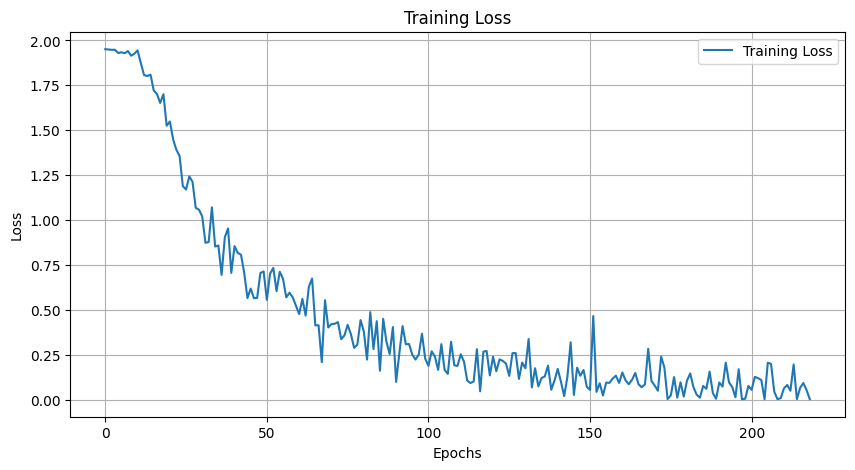

In [74]:
import matplotlib.pyplot as plt

# Assuming you have stored the losses during training in these lists
train_losses = trainer.state.log_history  # This contains log history with losses
train_loss_values = []


for log in train_losses:
    if 'loss' in log:
        train_loss_values.append(log['loss'])

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(train_loss_values, label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [77]:
import matplotlib.pyplot as plt

data=pd.DataFrame(trainer.state.log_history)
data=data.head(200)
train_losses=data['loss']
eval_losses=data['eval_loss']
steps=data['step']

    # Create the plot
plt.figure(figsize=(10, 6))
    # Plot train_losses and eval_loss against steps
plt.plot(steps,train_losses,lable="training loss", color='blue')
plt.plot(steps, eval_losses,  label='Validation Loss', color='red')

    # Customize the plot
plt.xlabel('Training Steps')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Training Steps')
plt.legend()
plt.grid(True)

    # Display the plot
plt.show()

ValueError: too many values to unpack (expected 2)

In [67]:

from sklearn.metrics import confusion_matrix
# Now you can make predictions
predictions = trainer.predict(small_test_dataset)

# Get the predicted labels and true labels
predicted_labels = np.argmax(predictions.predictions, axis=1)
true_labels =  small_test_dataset['labels']
# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print(cm)

[[61  5  1  0  2  0  1]
 [ 8 53  8  1  7  0  0]
 [ 0  3 31  2  1  1  1]
 [ 0  0  1 41  2  1  0]
 [ 0  5  1  3 86  0  0]
 [ 0  0  6  1  0 44  0]
 [ 0  0  1  0  0  0 51]]


In [78]:
from sklearn.metrics import classification_report
print(classification_report(true_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88        70
           1       0.80      0.69      0.74        77
           2       0.63      0.79      0.70        39
           3       0.85      0.91      0.88        45
           4       0.88      0.91      0.89        95
           5       0.96      0.86      0.91        51
           6       0.96      0.98      0.97        52

    accuracy                           0.86       429
   macro avg       0.85      0.86      0.85       429
weighted avg       0.86      0.86      0.86       429



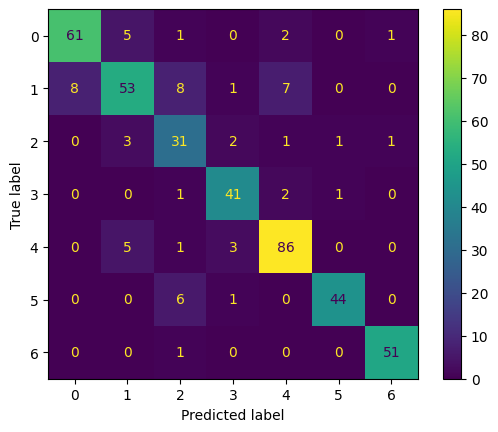

In [79]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [80]:
#overall performance of the fine-tuned BERT model on Amharic new classification
trainer.evaluate(small_test_dataset)

{'eval_loss': 0.7960960268974304,
 'eval_precision': 0.8601772777985718,
 'eval_recall': 0.8554778554778555,
 'eval_f1': 0.8557482598287414,
 'eval_accuracy': 0.8554778554778555,
 'eval_runtime': 14.8949,
 'eval_samples_per_second': 28.802,
 'eval_steps_per_second': 3.625,
 'epoch': 10.0}

In [93]:
X_train=train_val_df['articles']
y_train=train_val_df['labels']

In [96]:

from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments, AutoTokenizer
from sklearn.model_selection import KFold
import torch

In [ ]:
kf = KFold(n_splits=5)
def create_dataset(encodings, labels):

    return torch.utils.data.TensorDataset(
        torch.tensor(encodings['input_ids']),
        torch.tensor(encodings['attention_mask']),
        torch.tensor(labels)
    )
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train.index)):
    print(f"Fold {fold+1}")

    # Access data using .iloc for integer-based indexing
    X_train_fold = X_train.iloc[train_idx]
    y_train_fold = y_train.iloc[train_idx]
    X_val_fold = X_train.iloc[val_idx]
    y_val_fold = y_train.iloc[val_idx]

    # Tokenize the data for this fold
    train_encodings = tokenizer(list(X_train_fold), truncation=True, padding=True)
    val_encodings = tokenizer(list(X_val_fold), truncation=True, padding=True)

    # Create training and validation datasets
    train_dataset = create_dataset(train_encodings, list(y_train_fold))
    val_dataset = create_dataset(val_encodings, list(y_val_fold))

    # 4. Initialize Model and Tokenizer

    model_name = "Davlan/bert-base-multilingual-cased-finetuned-amharic"  # Replace with your desired model
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=7)


    # 5. Define Training Arguments
    training_args = TrainingArguments(
        output_dir="./results",
        eval_strategy='epoch',
        save_strategy='epoch',
        num_train_epochs=10,
        learning_rate=1e-5,
        per_device_train_batch_size=4,  # batch size per device during training
        per_device_eval_batch_size=8,   # batch size for evaluation
        warmup_steps=1000,                # number of warmup steps for learning rate
        weight_decay=0.01,
        run_name="Amharic news document",# strength of weight decay
        logging_dir='./logs',            # directory for storing logs
        logging_steps=20,
        load_best_model_at_end= True,

    )

    # 6. Create Trainer Instance
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=small_train_dataset,
        eval_dataset=small_eval_dataset,
        compute_metrics=custom_metrics,
        callbacks = [EarlyStoppingCallback(early_stopping_patience=10)],

    )

    # 7. Train the Model
    trainer.train()

    # 8. Evaluate the Model
    results = trainer.evaluate()
    print(f"Fold {fold+1} Results:", results)
    print(f"Fold {fold+1} Test: ",trainer.evaluate(small_test_dataset))


Fold 1


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at Davlan/bert-base-multilingual-cased-finetuned-amharic and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,1.360400,1.082692,0.718276,0.697143,0.684231,0.697143
2,0.802700,0.597137,0.802510,0.794286,0.779295,0.794286
3,0.681000,0.350185,0.881651,0.880000,0.880006,0.880000
4,0.418900,0.267255,0.931625,0.925714,0.927040,0.925714
5,0.255600,0.197594,0.949810,0.948571,0.949052,0.948571
6,0.226300,0.179548,0.955658,0.954286,0.954480,0.954286
7,0.118800,0.173093,0.962558,0.960000,0.960267,0.960000
8,0.002100,0.171124,0.961119,0.960000,0.960285,0.960000
9,0.072000,0.107793,0.977407,0.977143,0.977058,0.977143
10,0.002300,0.100209,0.977407,0.977143,0.977058,0.977143


Fold 1 Results: {'eval_loss': 0.1002093181014061, 'eval_precision': 0.9774068259782545, 'eval_recall': 0.9771428571428571, 'eval_f1': 0.9770578884349225, 'eval_accuracy': 0.9771428571428571, 'eval_runtime': 6.9709, 'eval_samples_per_second': 25.104, 'eval_steps_per_second': 3.156, 'epoch': 10.0}
Fold 1 Test:  {'eval_loss': 0.8159376978874207, 'eval_precision': 0.8699232076494211, 'eval_recall': 0.8648018648018648, 'eval_f1': 0.8646702047479091, 'eval_accuracy': 0.8648018648018648, 'eval_runtime': 14.7921, 'eval_samples_per_second': 29.002, 'eval_steps_per_second': 3.651, 'epoch': 10.0}
Fold 2


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at Davlan/bert-base-multilingual-cased-finetuned-amharic and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


model.safetensors:   0%|          | 0.00/712M [00:00<?, ?B/s]

Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,1.411500,1.137878,0.775484,0.742857,0.739701,0.742857
2,0.797500,0.522548,0.824739,0.811429,0.801606,0.811429
3,0.600000,0.286511,0.884266,0.874286,0.876870,0.874286
4,0.409900,0.294621,0.926151,0.920000,0.919652,0.920000
5,0.211600,0.125138,0.958440,0.954286,0.955324,0.954286
6,0.271500,0.094699,0.971837,0.971429,0.971528,0.971429
7,0.052300,0.053292,0.988571,0.988571,0.988571,0.988571
8,0.002100,0.064266,0.983810,0.982857,0.983183,0.982857
9,0.055200,0.078519,0.978087,0.977143,0.977361,0.977143
10,0.011800,0.071601,0.977251,0.977143,0.977018,0.977143


Fold 2 Results: {'eval_loss': 0.0532921701669693, 'eval_precision': 0.9885714285714285, 'eval_recall': 0.9885714285714285, 'eval_f1': 0.9885714285714285, 'eval_accuracy': 0.9885714285714285, 'eval_runtime': 7.072, 'eval_samples_per_second': 24.745, 'eval_steps_per_second': 3.111, 'epoch': 10.0}
Fold 2 Test:  {'eval_loss': 0.6704920530319214, 'eval_precision': 0.883407440436365, 'eval_recall': 0.8811188811188811, 'eval_f1': 0.88108712315935, 'eval_accuracy': 0.8811188811188811, 'eval_runtime': 14.8915, 'eval_samples_per_second': 28.808, 'eval_steps_per_second': 3.626, 'epoch': 10.0}
Fold 3


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at Davlan/bert-base-multilingual-cased-finetuned-amharic and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,1.411500,1.137878,0.775484,0.742857,0.739701,0.742857
2,0.797500,0.522548,0.824739,0.811429,0.801606,0.811429
3,0.600000,0.286519,0.884266,0.874286,0.876870,0.874286
4,0.410100,0.294524,0.926151,0.920000,0.919652,0.920000
5,0.212000,0.125226,0.958440,0.954286,0.955324,0.954286
6,0.273300,0.094163,0.971837,0.971429,0.971528,0.971429
7,0.049200,0.053936,0.982974,0.982857,0.982840,0.982857
8,0.002100,0.065018,0.983810,0.982857,0.983183,0.982857
9,0.054200,0.077707,0.978087,0.977143,0.977361,0.977143
10,0.012800,0.071348,0.977251,0.977143,0.977018,0.977143


Fold 3 Results: {'eval_loss': 0.05393562465906143, 'eval_precision': 0.9829737609329445, 'eval_recall': 0.9828571428571429, 'eval_f1': 0.9828397595306501, 'eval_accuracy': 0.9828571428571429, 'eval_runtime': 7.4223, 'eval_samples_per_second': 23.578, 'eval_steps_per_second': 2.964, 'epoch': 10.0}
Fold 3 Test:  {'eval_loss': 0.6642363667488098, 'eval_precision': 0.8803816769171399, 'eval_recall': 0.8764568764568764, 'eval_f1': 0.8765769005729812, 'eval_accuracy': 0.8764568764568764, 'eval_runtime': 15.0772, 'eval_samples_per_second': 28.454, 'eval_steps_per_second': 3.582, 'epoch': 10.0}
Fold 4


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at Davlan/bert-base-multilingual-cased-finetuned-amharic and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,1.411500,1.137878,0.775484,0.742857,0.739701,0.742857
2,0.797500,0.522548,0.824739,0.811429,0.801606,0.811429
3,0.600000,0.286511,0.884266,0.874286,0.876870,0.874286
4,0.409900,0.294620,0.926151,0.920000,0.919652,0.920000
5,0.211600,0.125137,0.958440,0.954286,0.955324,0.954286
6,0.271500,0.094695,0.971837,0.971429,0.971528,0.971429
7,0.052300,0.053310,0.983810,0.982857,0.983183,0.982857
8,0.002100,0.064177,0.983810,0.982857,0.983183,0.982857
9,0.055100,0.078476,0.978087,0.977143,0.977361,0.977143
10,0.011900,0.071563,0.977251,0.977143,0.977018,0.977143


Fold 4 Results: {'eval_loss': 0.05331034958362579, 'eval_precision': 0.9838095238095239, 'eval_recall': 0.9828571428571429, 'eval_f1': 0.9831829752571022, 'eval_accuracy': 0.9828571428571429, 'eval_runtime': 7.428, 'eval_samples_per_second': 23.559, 'eval_steps_per_second': 2.962, 'epoch': 10.0}
Fold 4 Test:  {'eval_loss': 0.670329749584198, 'eval_precision': 0.8817415281615888, 'eval_recall': 0.8787878787878788, 'eval_f1': 0.8790257669657457, 'eval_accuracy': 0.8787878787878788, 'eval_runtime': 15.498, 'eval_samples_per_second': 27.681, 'eval_steps_per_second': 3.484, 'epoch': 10.0}
Fold 5


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at Davlan/bert-base-multilingual-cased-finetuned-amharic and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,1.411500,1.137878,0.775484,0.742857,0.739701,0.742857
2,0.797500,0.522548,0.824739,0.811429,0.801606,0.811429
3,0.600000,0.286511,0.884266,0.874286,0.876870,0.874286


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,1.411500,1.137878,0.775484,0.742857,0.739701,0.742857
2,0.797500,0.522548,0.824739,0.811429,0.801606,0.811429
3,0.600000,0.286511,0.884266,0.874286,0.876870,0.874286
4,0.409900,0.294618,0.926151,0.920000,0.919652,0.920000
5,0.211600,0.125144,0.958440,0.954286,0.955324,0.954286
6,0.271500,0.094685,0.971837,0.971429,0.971528,0.971429
7,0.051600,0.053554,0.983810,0.982857,0.983183,0.982857
8,0.002100,0.063713,0.983810,0.982857,0.983183,0.982857


# New Section